In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.cosmology
import scipy.stats
import time
from useful_funcs import PAUSflux_to_ABmag
import h5py
import matplotlib.colors
import os
from SAVEFIG import main as custom_SAVEFIG

latex_textwidth = 455.24#pt

def fixed_aspect_ratio(ratio):
    '''
    Set a fixed aspect ratio on matplotlib plots 
    regardless of axis units
    '''
    xvals,yvals = plt.gca().axes.get_xlim(),plt.gca().axes.get_ylim()

    xrange = xvals[1]-xvals[0]
    yrange = yvals[1]-yvals[0]
    plt.gca().set_aspect(ratio*(xrange/yrange), adjustable='box')

#matplotlib.rcParams['agg.path.chunksize'] = 10000

In [2]:
from astropy.cosmology import Planck15 as cosmo

cosmo = cosmo.clone(name='Planck15 H0 = 100', H0=100) #setting H0 = 100 km/s/MPc, h = 1


In [3]:
data = pd.read_pickle("../../Data/Object_zs_zp_181203_130401.pkl.gz")


lcCoreFilename = "Gonzalez13.PAU.MillGas.field1.core.0.hdf5"
lcPhotomFilename = "Gonzalez13.PAU.MillGas.field1.photometry.0.hdf5"

if os.environ['NAME'] == 'DESKTOP-RB5C8OC': 
    file_path = '/mnt/e/L4ProjectLocal/LightConeData/'
elif os.environ['NAME'] == 'LaNaranjaDos':
    file_path = '/mnt/c/Users/Andrew/L4ProjectLocal/Light Cone Data/'
else: raise Exception('Device not configured for hdf5 data load')

LC_DATA_CORE = h5py.File(file_path+lcCoreFilename, "r")
LC_DATA_PHOTOM = h5py.File(file_path+lcPhotomFilename, "r")

In [4]:
def ub68(x):
    return np.percentile(x,50+34.1)

def lb68(x):
    return np.percentile(x,50-34.1)

In [5]:
# ML_DATA

# ANNz run performace (PAUS_advanced7)

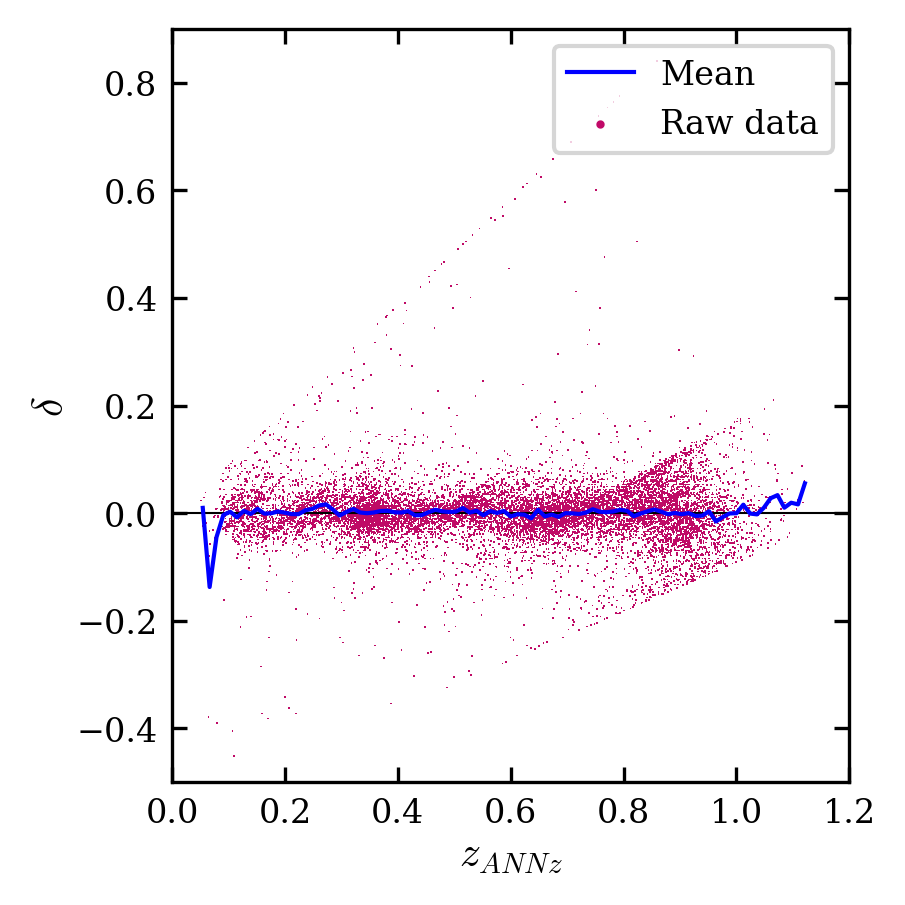

In [6]:
ML_DATA = pd.read_csv('../../ML runs/PAUS_advanced7/ANNZ_randomReg_0000.csv',header=0)
z_annz = ML_DATA['F:ANNZ_best']
z_paus = ML_DATA['F:Z']
z_annz_errors = ML_DATA['F:ANNZ_best_err']

ML_input = pd.read_csv('../../Data/ANNz_data5b.csv',header=0)

r1, g1, b1 = 255, 235, 247
r1, g1, b1 = r1/255, g1/255, b1/255

cdict1 = {'red':   ((0.0, r1, r1),
                   (1.0, 0.75, 0.75)),

         'green': ((0.0, g1, g1),
                   (1.0, 0.04, 0.04)),

         'blue':  ((0.0, b1, b1),
                   (1.0, 0.4, 0.4)),
          
         'alpha': ((0.0, 0.0, 0.0),
                   (1e-20, 1.0, 1.0),
                    (1.0, 1.0, 1.0))
        }

clear_purple = matplotlib.colors.LinearSegmentedColormap('ClearPurple', cdict1)
plt.register_cmap(cmap=clear_purple)

error = z_annz - z_paus
normed_error = error / (1+z_paus)

N_points = 1e4
# print(ML_DATA.shape,N_points)

bins = np.linspace(0,1.2,100)
mean,edge,counts = scipy.stats.binned_statistic(z_annz,normed_error,'mean',bins=bins)

indices = np.random.choice(ML_DATA.shape[0],int(N_points),replace=False)

factor = latex_textwidth/72*0.5
plt.figure(figsize=(factor,factor),dpi=300)
# plt.scatter(z_paus.loc[indices],normed_error.loc[indices],s=0.1)
pixs = 1000
bounds = [0,0.9,1e6]
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
# hist = plt.hist2d(z_paus.loc[:],normed_error.loc[:],[pixs,pixs],cmap='ClearPurple',zorder=2)

hist = plt.hist2d(z_annz.loc[:],normed_error.loc[:],[pixs,pixs],norm=norm,cmap='ClearPurple',zorder=2)
# norm=matplotlib.colors.LogNorm()
plt.plot((bins[1:]+bins[:-1])/2,mean,'b-',zorder=10,label='Mean')
plt.axhline(linewidth=0.5,zorder=3,color='black')
plt.ylabel('$\delta$')
plt.xlabel('$z_{ANNz}$')

plt.scatter([-1],[-1],s=1,color='#c10968',label='Raw data')
plt.xlim(0,1.2)
plt.ylim(-0.5,0.9)

# plt.colorbar(hist[3])
plt.legend()
plt.tight_layout()
plt.gca().xaxis.labelpad = 1
plt.gca().yaxis.labelpad = 1
# custom_SAVEFIG('ML_ERROR')
plt.show()

In [7]:
outliers_idx = abs(normed_error) > 0.15
out_perc = outliers_idx.sum()/outliers_idx.size *100


print("\
Mean normed error                             = {:1.2e} \n\
st. dev of normed error                       = {:.3f}\n\
Percentage of 'catastrophic' outliers         = {:.3f}%\n\
half width of 68th percentile of normed error = {:.3f}"\
.format(normed_error.mean(),np.std(normed_error),out_perc,(ub68(normed_error)-lb68(normed_error))/2))

Mean normed error                             = 1.08e-03 
st. dev of normed error                       = 0.061
Percentage of 'catastrophic' outliers         = 2.271%
half width of 68th percentile of normed error = 0.036


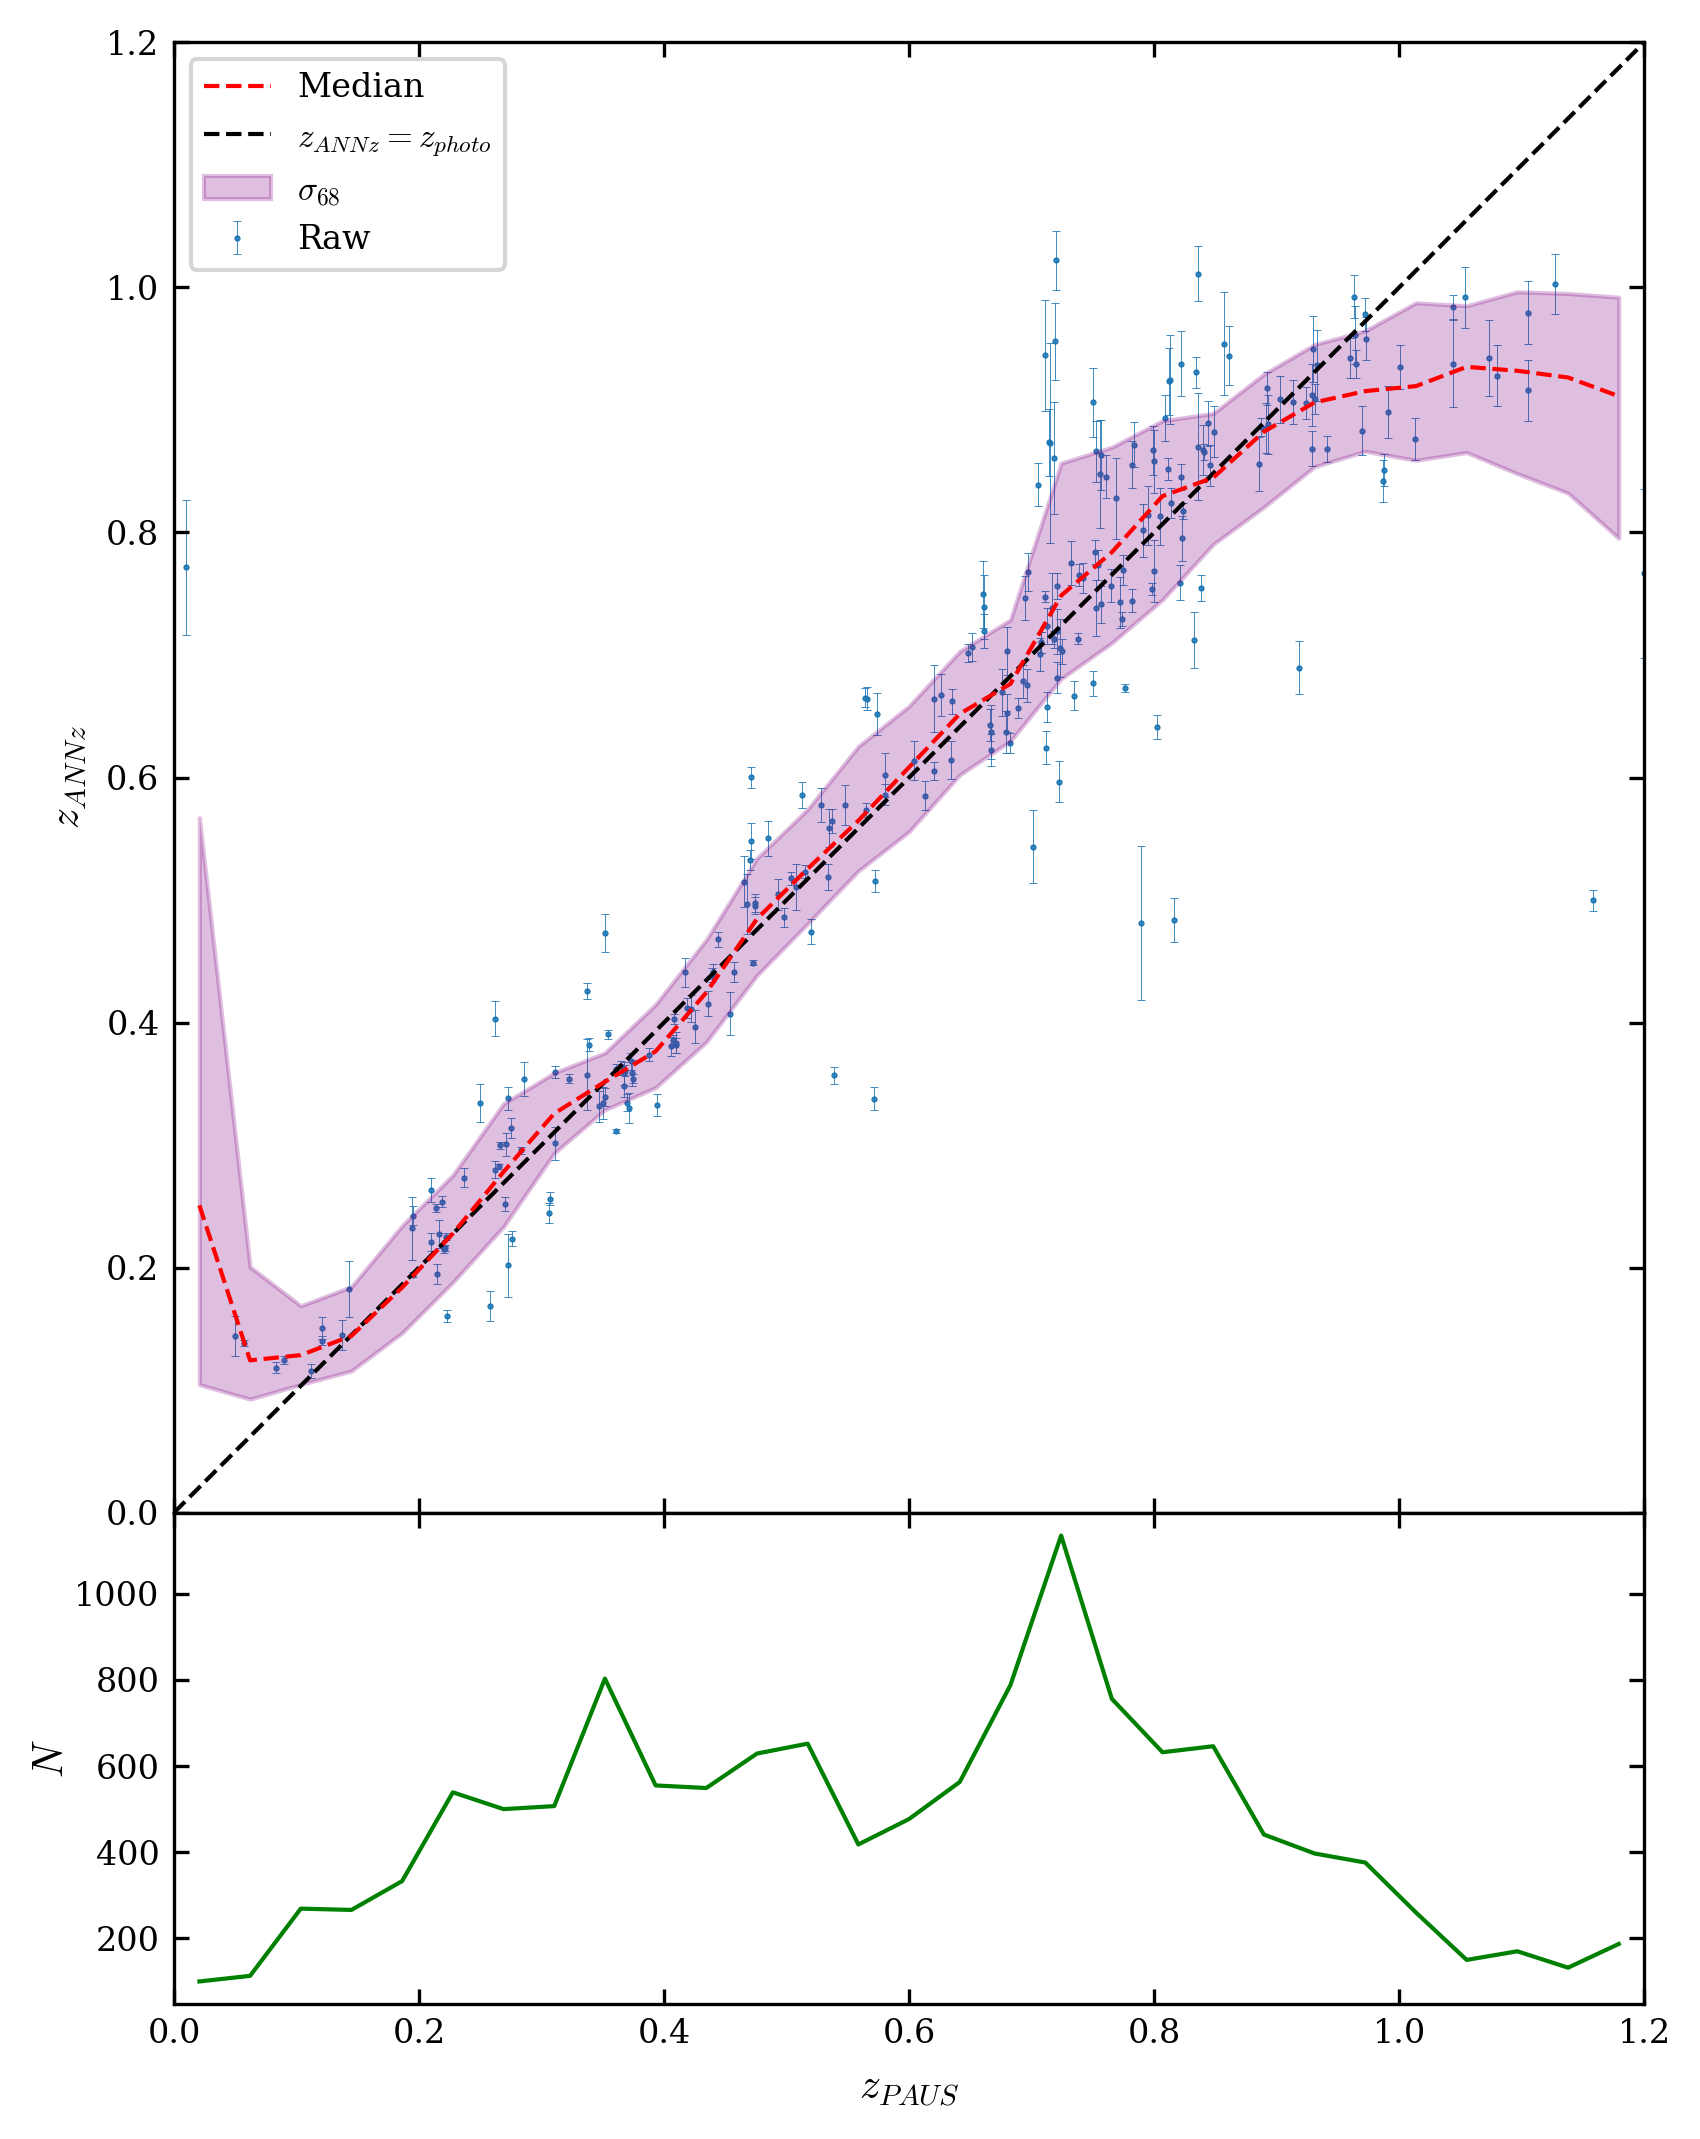

In [8]:
# ML_DATA = pd.read_csv('../../ML runs/PAUS_advanced7/ANNZ_randomReg_0000.csv',header=0)
# ML_DATA
# print(ML_DATA.shape)
N_points = 250
indices = np.random.choice(ML_DATA.shape[0],N_points,replace=False)

min_bin, max_bin, N_bin = 0.0,1.2,30
bins = np.linspace(min_bin, max_bin, N_bin)
meds,edge,counts = scipy.stats.binned_statistic(z_paus,z_annz,'median',bins=bins)
lbs = scipy.stats.binned_statistic(z_paus,z_annz,lb68,bins)[0]
ubs = scipy.stats.binned_statistic(z_paus,z_annz,ub68,bins)[0]


factor = latex_textwidth/72#*0.5
# fig = plt.figure(figsize=(factor*1.2,factor),dpi=300)
fig, (ax1,ax2) = plt.subplots(2,1,gridspec_kw = {'height_ratios':[3, 1]},figsize=(1*factor,1.37*factor),dpi=300,sharex=True)

ax1.errorbar(z_paus.loc[indices],z_annz.loc[indices],yerr=z_annz_errors.loc[indices]\
             ,fmt='o',ms=0.5,linewidth=0.2,capsize=1,capthick=0.2,label='Raw'.format(N_points),zorder=1)
ax1.plot((bins[:-1]+bins[1:])/2,meds,'r--',label='Median',zorder=5,linewidth=1)
ax1.plot([0,1.2],[0,1.2],'k--',label=r'$z_{ANNz}=z_{photo}$',zorder=4,linewidth=1)
ax1.fill_between((bins[1:]+bins[:-1])/2,lbs,ubs,alpha=0.25,zorder=3,label=r'$\sigma_{68}$',color='purple')
ax2.set_xlabel(r'$z_{PAUS}$')
ax1.set_ylabel(r'$z_{ANNz}$')
ax1.legend(fontsize=8)
ax1.set_xlim(0.0,1.2)
ax1.set_ylim(0,1.2)
ax1.set_aspect('equal')

# ax2 = plt.subplot(212)
unique, counted = np.unique(counts, return_counts=True)
# print(unique,'\n',counted)
# ax2.plot((bins[:-1]+bins[1:])/2,counted/(max_bin-min_bin)*N_bin,'g-',zorder=5,linewidth=1)
# ax2.set_ylabel('$n$') #object density
ax2.plot((bins[:-1]+bins[1:])/2,counted,'g-',zorder=5,linewidth=1)
ax2.set_ylabel('$N$')
ax2.yaxis.labelpad=0.5


fig.subplots_adjust(hspace=0)
# custom_SAVEFIG('ML')

plt.show()

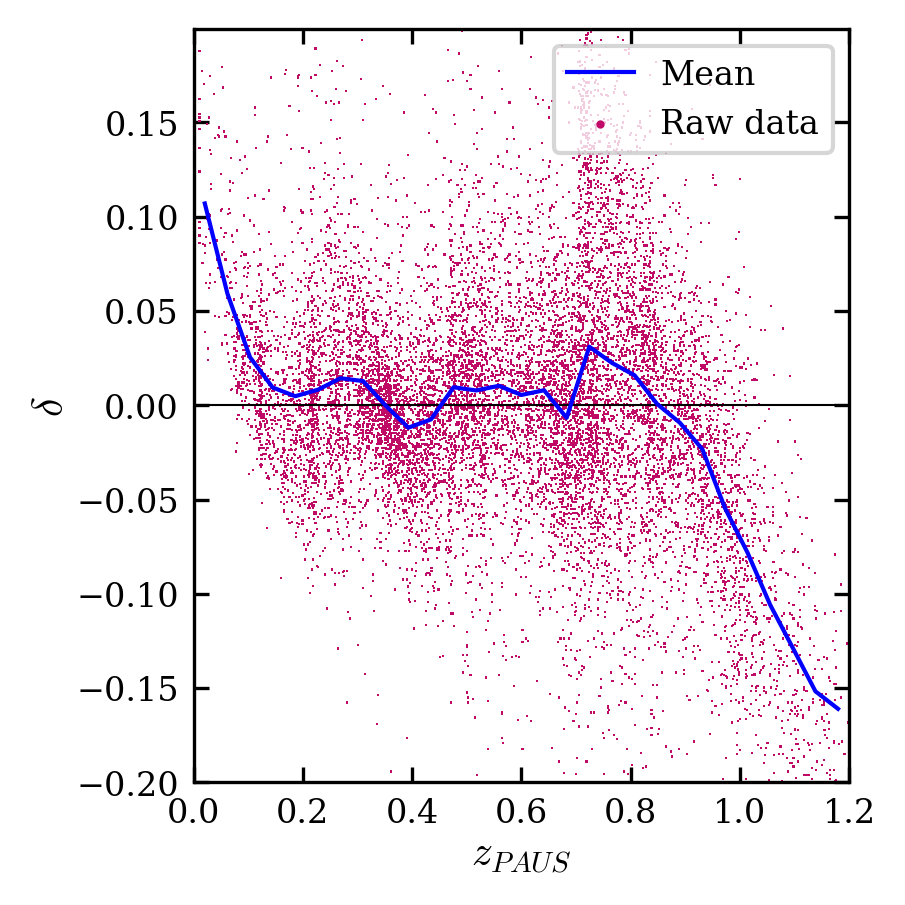

In [10]:
# r1, g1, b1 = 255, 235, 247
# r1, g1, b1 = r1/255, g1/255, b1/255

# cdict1 = {'red':   ((0.0, r1, r1),
#                    (1.0, 0.75, 0.75)),

#          'green': ((0.0, g1, g1),
#                    (1.0, 0.04, 0.04)),

#          'blue':  ((0.0, b1, b1),
#                    (1.0, 0.4, 0.4)),
          
#          'alpha': ((0.0, 0.0, 0.0),
#                    (1e-20, 1.0, 1.0),
#                     (1.0, 1.0, 1.0))
#         }

# clear_purple = matplotlib.colors.LinearSegmentedColormap('ClearPurple', cdict1)
# plt.register_cmap(cmap=clear_purple)

bins = np.linspace(0.0,1.2,30)

error_lims = [-0.2,0.2]
mask = (error <= error_lims[1]) & (error>=error_lims[0])
z_paus, error = z_paus.loc[mask], error.loc[mask]

mean,edge,counts = scipy.stats.binned_statistic(z_paus,error,'mean',bins=bins)



factor = latex_textwidth/72*0.5
plt.figure(figsize=(factor,factor),dpi=300)
# plt.scatter(z_paus.loc[indices],normed_error.loc[indices],s=0.1)
pixs = 600
bounds = [0,0.9,1e6]
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
# hist = plt.hist2d(z_paus.loc[:],normed_error.loc[:],[pixs,pixs],cmap='ClearPurple',zorder=2)

hist = plt.hist2d(z_paus,error,[pixs,pixs],norm=norm,cmap='ClearPurple',zorder=2)
# norm=matplotlib.colors.LogNorm()
plt.plot((bins[1:]+bins[:-1])/2,mean,'b-',zorder=10,label='Mean')
plt.axhline(linewidth=0.5,zorder=3,color='black')
plt.ylabel('$\delta$')
plt.xlabel('$z_{PAUS}$')

plt.scatter([-1],[-1],s=1,color='#c10968',label='Raw data')
plt.xlim(0.0,1.2)
# plt.ylim(-0.75,0.75)

# plt.colorbar(hist[3])
plt.legend()
plt.tight_layout()
plt.gca().xaxis.labelpad = 1
plt.gca().yaxis.labelpad = 1
# custom_SAVEFIG('ML_ERROR')
plt.show()

# PAUS redshift calculation performance

In [8]:
data_cut = data.loc[pd.notna(data['zspec']) & (data['zspec']!=0)]
delta_spec = (data_cut['zb'] - data_cut['zspec'])/(1+data_cut['zspec'])


outliers_idx = abs(delta_spec) > 0.15
out_perc = outliers_idx.sum()/outliers_idx.size *100

print("\
Mean normed error                     = {:1.2e} \n\
st. dev of normed error               = {:.3f}\n\
Percentage of 'catastrophic' outliers = {:.3f}%\n\
half width of 68th percentile of normed error = {:.3f}"\
.format(delta_spec.mean(),np.std(delta_spec),out_perc,(ub68(delta_spec)-lb68(delta_spec))/2))

Mean normed error                     = -6.51e-03 
st. dev of normed error               = 0.071
Percentage of 'catastrophic' outliers = 3.720%
half width of 68th percentile of normed error = 0.016


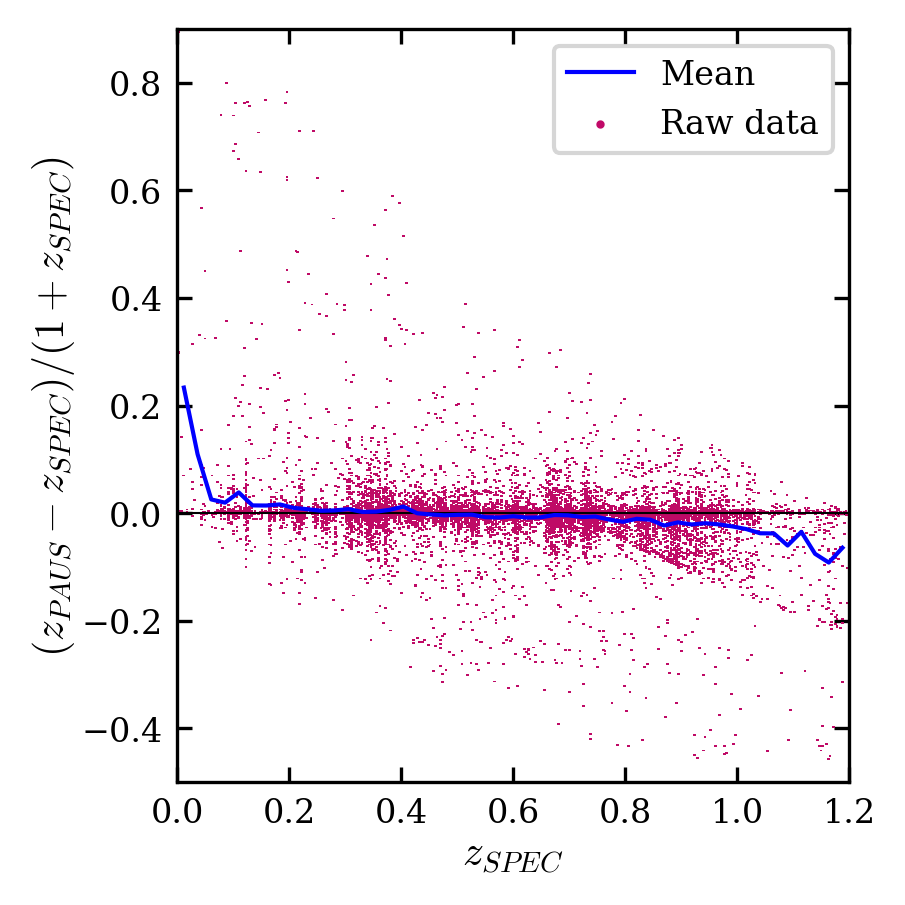

In [20]:
bins = np.linspace(0,1.2,50)
mean,edge,counts = scipy.stats.binned_statistic(data_cut['zspec'],delta_spec,'mean',bins=bins)



factor = latex_textwidth/72*0.5
plt.figure(figsize=(factor,factor),dpi=300)
# plt.scatter(z_paus.loc[indices],normed_error.loc[indices],s=0.1)
pixs = 1000
bounds = [0,0.9,1e6]
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
# hist = plt.hist2d(z_paus.loc[:],normed_error.loc[:],[pixs,pixs],cmap='ClearPurple',zorder=2)

hist = plt.hist2d(data_cut['zspec'],delta_spec,[pixs,pixs],norm=norm,cmap='ClearPurple',zorder=2)
# norm=matplotlib.colors.LogNorm()
plt.plot((bins[1:]+bins[:-1])/2,mean,'b-',zorder=10,label='Mean')
plt.axhline(linewidth=0.5,zorder=3,color='black')
plt.ylabel('$(z_{PAUS}-z_{SPEC})/(1+z_{SPEC})$')
plt.xlabel('$z_{SPEC}$')

plt.scatter([-1],[-1],s=1,color='#c10968',label='Raw data')
plt.xlim(0,1.2)
plt.ylim(-0.5,0.9)

# plt.colorbar(hist[3])
plt.legend()
plt.tight_layout()
plt.gca().xaxis.labelpad = 1
plt.gca().yaxis.labelpad = 1
# custom_SAVEFIG('ML_ERROR')
plt.show()

In [21]:
data_cut.shape

(15807, 176)

# Distribution of i band mag for objects with zspec data

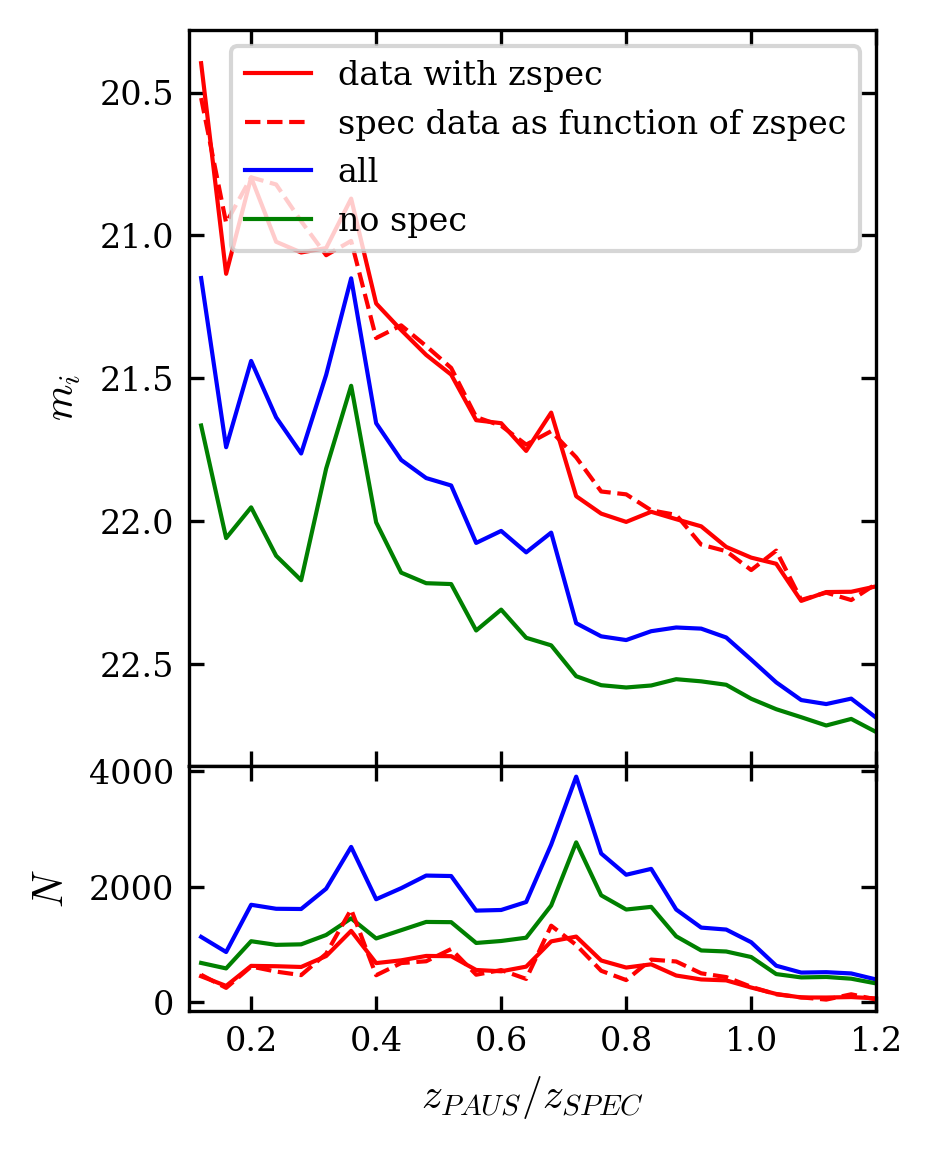

In [22]:
data_sample = data.loc[pd.notna(data['zspec']) & (data['zspec']!=0)]

factor = latex_textwidth/72*0.5
fig, (ax1,ax2) = plt.subplots(2,1,gridspec_kw = {'height_ratios':[3, 1]},figsize=(1*factor,1.37*factor),dpi=300,sharex=True)


# ax = plt.subplot(331+i)
bins = []
bin_range = [0.1,1.2]
#     print(bin_range)

bin_increment = 0.04
temp_bins = np.arange(bin_range[0],bin_range[1]+bin_increment,bin_increment)
for ind,i in enumerate(temp_bins[:-1]):
    bins.append([temp_bins[ind],temp_bins[ind+1]])


median_imags_PA,bins,dig_P = scipy.stats.binned_statistic(data_sample['zb'],data_sample['i_auto'],'median',temp_bins)
unique, counts_P = np.unique(dig_P,return_counts=True)

median_imags_all, bins, dig_all = scipy.stats.binned_statistic(data['zb'],data['i_auto'],'median',temp_bins)
unique_all, counts_all = np.unique(dig_all,return_counts=True)

median_imags_nospec, bins, dig_nospec = scipy.stats.binned_statistic(data.loc[data['zspec']==0,'zb'],data.loc[data['zspec']==0,'i_auto'],'median',temp_bins)
unique_nospec, counts_nospec = np.unique(dig_nospec,return_counts=True)


median_imags_spec,bins,dig_spec = scipy.stats.binned_statistic(data_sample['zspec'],data_sample['i_auto'],'median',temp_bins)
unique_spec, counts_spec = np.unique(dig_spec,return_counts=True)


mid_zbins = (temp_bins[1:]+temp_bins[:-1])/2
median_imag_LC_segments = []
counts_segs = []

ax1.plot(mid_zbins,median_imags_PA,'r-',label='data with zspec')
ax1.plot(mid_zbins,median_imags_spec,'r--',label='spec data as function of zspec')
ax1.plot(mid_zbins,median_imags_all,'b-',label='all')
ax1.plot(mid_zbins,median_imags_nospec,'g-',label='no spec')

ax2.set_xlabel('$z_{PAUS}/z_{SPEC}$')
ax1.set_xlim([0.1,1.2])
ax1.set_ylabel('$m_i$')
ax2.plot(mid_zbins,counts_P[1:],'r-',label='PAUS')
ax2.plot(mid_zbins,counts_all[1:],'b-')
ax2.plot(mid_zbins,counts_nospec[1:],'g-')
# print(counts_spec.size)
ax2.plot(mid_zbins,counts_spec[1:-1],'r--')

ax2.set_ylabel('$N$')

redshiftdip = 0.35
# ax1.axvline(redshiftdip,linestyle='--',color='blue',zorder=1,label='zb = {}'.format(redshiftdip))
# ax2.axvline(redshiftdip,linestyle='--',color='blue',zorder=1)
ax1.invert_yaxis()

ax1.legend(fontsize=8)
# print(counts_segs_[:,1:].mean(axis=0),'\n',counts_P[1:])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(left=0.175)
# custom_SAVEFIG('MEDIAN_i_BAND')
plt.show()
